In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
# !wget -P data -nc 'https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv'

In [5]:
# !head data/CreditScoring.csv

In [6]:
df = pd.read_csv('data/CreditScoring.csv')
df

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [7]:
df.columns = df.columns.str.lower()

In [8]:
df

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4450,2,1,1,60,39,2,1,1,69,92,0,0,900,1020
4451,1,22,2,60,46,2,1,1,60,75,3000,600,950,1263
4452,2,0,2,24,37,2,1,2,60,90,3500,0,500,963
4453,1,0,1,48,23,1,1,3,49,140,0,0,550,550


In [9]:
df.status.value_counts()

1    3200
2    1254
0       1
Name: status, dtype: int64

In [10]:
# map numerical codes to their real values. The real values were from the R code found under the same repo where the csv was download.
status_values = {
    1: 'ok',
    2: 'default',
    0: 'unk'
}
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unk'
}
marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unk'
}
records_values = {
    1: 'no',
    2: 'yes',
    0: 'unk'
}
job_values = {
    1: 'fixed',
    2: 'parttime',
    3: 'freelance',
    4: 'others',
    0: 'unk'
}

df.status = df.status.map(status_values)
df.home = df.home.map(home_values)
df.marital = df.marital.map(marital_values)
df.records = df.records.map(records_values)
df.job = df.job.map(job_values)



In [11]:
# Describe the dataset. Similar to summarise() in R.
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [12]:
# Looks like we have some unusual max numbers. We need them to 'na' as they are really missing values.
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [13]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [14]:
# We have only one record where status is 'unk'. This is not useful for us. So delete the record.
df = df[df.status != 'unk'].reset_index()

In [15]:
df

,index,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4449,4450,default,1,rent,60,39,married,no,fixed,69,92.0,0.0,0.0,900,1020
4450,4451,ok,22,owner,60,46,married,no,fixed,60,75.0,3000.0,600.0,950,1263
4451,4452,default,0,owner,24,37,married,no,parttime,60,90.0,3500.0,0.0,500,963
4452,4453,ok,0,rent,48,23,single,no,freelance,49,140.0,0.0,0.0,550,550


In [16]:
# data is now clean. Now do the train, val, test split.

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)

y_train =  (df_train.status == 'default').astype('int')
y_val = (df_val.status == 'default').astype('int')
y_test = (df_test.status == 'default').astype('int')

del df_train['status']
del df_val['status']
del df_test['status']

# Decision Trees

In [17]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [18]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train) # training the model with feature matrix and target

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

# AUC for validation dataset is quite bad.

0.6640369572061708

In [19]:
y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

# AUC for training dataset is very good. Why? This is due to Overfitting. Model is overfitted to the training data.
# This is because the treee depth if infinite so the training can resolve all the the branches and get to a precise target value.

1.0

In [20]:
# Let's try by limiting the tree depth to see if it can generalise the model.

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print(f'val auc = {auc}')

y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print(f'train auc = {auc}')


val auc = 0.7688993969630186
train auc = 0.8436235986704974


A tree with only one node it called a decision stump.

Let's see now to visualise the decision tree used by the model after the traning.

You will see the tree is built based on the actual values of the subset of records after each condition. A tree with about 5 node depth will show is much clearer.

In [21]:
print(export_text(dt, feature_names=dv.get_feature_names()))

|--- records=yes <= 0.50
|   |--- job=parttime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- assets <= 4250.00
|   |   |   |   |--- income <= 20.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- income >  20.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- assets >  4250.00
|   |   |   |   |--- debt <= 1850.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- debt >  1850.00
|   |   |   |   |   |--- class: 1
|   |   |--- income >  74.50
|   |   |   |--- seniority <= 5.50
|   |   |   |   |--- amount <= 1330.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amount >  1330.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- seniority >  5.50
|   |   |   |   |--- income <= 114.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- income >  114.50
|   |   |   |   |   |--- class: 0
|   |--- job=parttime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- time <= 27.00
|   |   |   |   |--- home=rent <= 0.50
|   |   |   |   |   |--- class: 0
|   |   

/Users/kaushalya/.local/share/virtualenvs/lessons-8Dio02nN/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Decision Tree Learning Algorithm

## Decision Tree Parameter Tuning

Decision trees use many different parameters to decide when to split (node) and when to stop (leaf). Let's focus on two such parameters and how to tune them:
* `max_depth`
* `min_samples_leaf`

To see an exhausive list of parameters, see `DecisionTreeClassifier` pydoc.

In [22]:
for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    dt  = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)

    print('%4s -> %.3f' % (d, auc))

   1 -> 0.606
   2 -> 0.669
   3 -> 0.739
   4 -> 0.761
   5 -> 0.768
   6 -> 0.753
  10 -> 0.699
  15 -> 0.651
  20 -> 0.650
None -> 0.658


In [23]:
scores = []

for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt  = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))
        # print('(%4s, %4s) -> %.3f' % (d, s, auc))

In [24]:
df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc',ascending=False)

,max_depth,min_samples_leaf,auc
22,6,15,0.780666
21,6,10,0.780109
24,6,100,0.776434
23,6,20,0.772239
20,6,5,0.770695
11,5,5,0.769705
9,5,1,0.768899
10,5,2,0.768445
25,6,200,0.768267
18,6,1,0.766662


In [25]:
# It's a bit hard to read the above table so let's visualise this in a heatmap

# First pivot the data so columns represent max_depth and rows represent min_samples_leaf. The intersections are the auc scores.
df_scores_pivot = df_scores.pivot(
    index='min_samples_leaf',
    columns=['max_depth'], 
    values=['auc'])
df_scores_pivot.round(3)

auc              
max_depth             4      5      6
min_samples_leaf                     
1                 0.761  0.769  0.767
2                 0.761  0.768  0.754
5                 0.761  0.770  0.771
10                0.761  0.764  0.780
15                0.762  0.766  0.781
20                0.759  0.762  0.772
100               0.756  0.763  0.776
200               0.747  0.759  0.768
500               0.680  0.680  0.680

<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

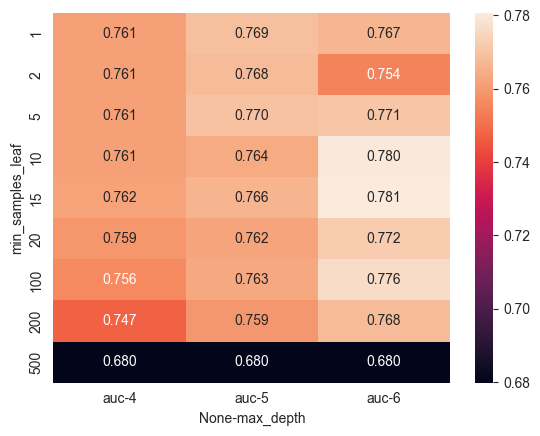

In [27]:
sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')

In [30]:
scores = []

for d in [4, 5, 6, 7, 10, 15, 20, None]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt  = DecisionTreeClassifier(max_depth=d, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, s, auc))


df_scores = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'auc'])
df_scores.sort_values(by='auc',ascending=False)


,max_depth,min_samples_leaf,auc
41,10.0,20,0.789567
59,20.0,20,0.787484
68,NaN,20,0.784820
50,15.0,20,0.784820
40,10.0,15,0.782661
...,...,...,...
64,NaN,2,0.673991
46,15.0,2,0.667046
54,20.0,1,0.663864
63,NaN,1,0.646927


<AxesSubplot: xlabel='None-max_depth', ylabel='min_samples_leaf'>

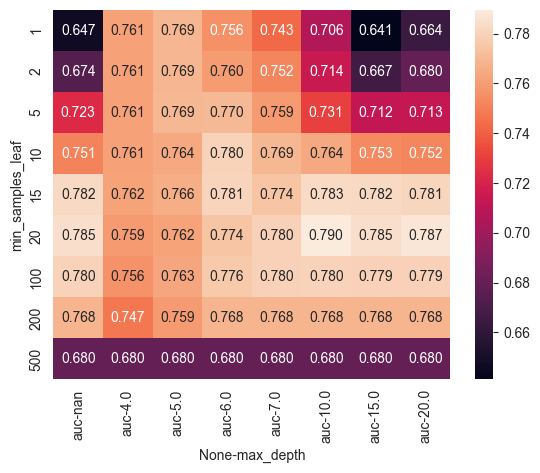

In [31]:
df_scores_pivot = df_scores.pivot(
    index='min_samples_leaf',
    columns=['max_depth'],
    values=['auc'])
df_scores_pivot.round(3)

sns.heatmap(df_scores_pivot, annot=True, fmt='.3f')


In [32]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)